In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
from matplotlib_venn import venn2
from matplotlib_venn import venn3

## Read smpls list

In [2]:
# fist BGI samples set
path='/Users/katerynapantiukh/Documents/1MyDisk/PhD/!MAIN_data' # 
#path='/Users/ketpantuh/Documents/1MyDisk/PhD/!MAIN_data' # macbook

bn = pd.read_excel(str(path)+'/bgi_assembly_v1/HQcl_all_bins_all_info.xlsx')
bn['smpl_name'] = bn['bin_name'].str.split('_').str[0]
ass_smpls = bn['smpl_name'].unique()
# ass_smpls to df

print('fist BGI samples set:', len(ass_smpls))

fist BGI samples set: 1878


In [6]:
# Secon BGI samples set
allB = pd.read_csv(str(path)+'/code/input/smpls_lists/reads_size_full_BGI.csv', sep='\t',header=None)
allB['smpls_name'] = allB[1].str.split('_').str[1]

# How much samples are in both lists?
print('BGI banch1: ', len(ass_smpls))
print('BGI banch1: ', len(allB) - len(ass_smpls))

# find difference between b2 and ass_smpls
b2 = allB[~allB['smpls_name'].isin(ass_smpls)]
#b2[1].to_csv('results2/bgi_b2.csv', index=False)

BGI banch1:  1878
BGI banch1:  224


In [5]:
ass_smpls
df = pd.DataFrame(ass_smpls, columns=['smpl_name'])
df.head(2)

,smpl_name
0,V0404P
1,V1T1XL


In [7]:
# Samples selected to BGIvsIllumina comparison
comp = pd.read_csv(str(path)+'/code/input/smpls_lists/final_smpls_list_1990.csv')

# select samples from first sets
df = pd.DataFrame(ass_smpls, columns=['smpl_name'])
s1 = comp.merge(df, on='smpl_name', how='inner')
print(f'Within 1990 samples, {len(s1)} belonged to the first BGI samples set')

# select samples from second sets
s2 = comp.merge(b2, left_on='smpl_name', right_on='smpls_name', how='inner')
print(f'Within 1990 samples, {len(s2)} belonged to the second BGI samples set')

Within 1990 samples, 1848 belonged to the first BGI samples set
Within 1990 samples, 142 belonged to the second BGI samples set


In [8]:
# find not present in p1 samples
# More distant
kg = pd.read_csv('BGI_Illumina_calls_comparison_table.txt', sep='\t')
kg.head(2)
# Still distant but closer to the rest
#kinga2 = pd.read_csv('input/smpls_lists/kinga2.csv')

,bgi,shared,ill,sample,sample_no
0,0.046688,0.922910,0.030402,V2A14B,1.0
1,0.043809,0.916727,0.039464,VYCU1M,2.0


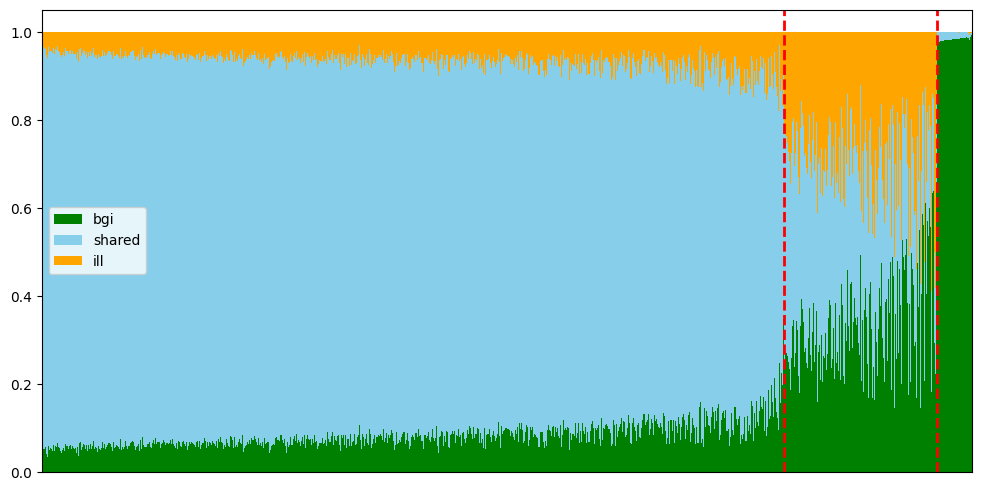

In [7]:
# plot
kgp = kg.drop(columns=['sample_no'])
# create stacked bar chart for monthly temperatures
kgp.plot(kind='bar', stacked=True, color=['green', 'skyblue', 'orange'], width=1, figsize=(12, 6))
plt.xticks([])
plt.axvline(x=1916, color='red', linestyle='--', linewidth=2)
plt.axvline(x=1587, color='red', linestyle='--', linewidth=2)

In [8]:
rn = pd.read_csv(str(path)+'/code/input/smpls_lists/reads_number_Illumina.csv', sep=' ', header=None)
# add column name
rn.columns = ['smpl_name', 'reads']
rn['sample'] = rn['smpl_name'].str.split('_').str[1]
d3 =rn.merge(kg, on='sample', how='inner')
d3.head(3)

,smpl_name,reads,sample,bgi,shared,ill,sample_no
0,ill_V00H9L,15360223,V00H9L,0.074449,0.875521,0.050030,438.0
1,ill_V010T4,16088657,V010T4,0.049881,0.899642,0.050478,42.0
2,ill_V03HFT,14619667,V03HFT,0.082144,0.876351,0.041505,412.0


# Does it correlate  with batch number? - No

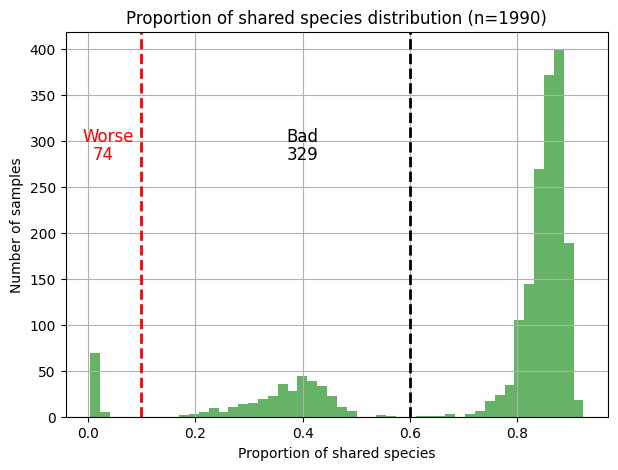

In [76]:
d3['shared'].hist(bins=50, figsize=(7,5), alpha=0.6, color='green')
plt.title('Proportion of shared species distribution (n=1990)')
plt.xlabel('Proportion of shared species')
plt.ylabel('Number of samples')

plt.axvline(x=0.1, color='red', linestyle='--', linewidth=2)
plt.axvline(x=0.6, color='black', linestyle='--', linewidth=2)

plt.text(-0.01, 300, 'Worse', fontsize=12, color='red')
plt.text(0.37, 300, 'Bad', fontsize=12, color='black')
plt.text(0.01, 280, '74', fontsize=12, color='red')
plt.text(0.37, 280, '329', fontsize=12, color='black')


plt.savefig('results/shared_species_distribution.png')

In [9]:
# select samples for "WORSE" group
wrs = kg[kg['bgi']>0.9]
print('Number of worse samples:',len(wrs))

# select samples for "BAD" group
bad = kg[(kg['shared'] < 0.6)&(kg['shared'] > 0.1)]
print('Number of bad samples:',len(bad))

# select samples for "GOOD" group
good = kg[kg['shared'] > 0.6]
print('Number of good samples:',len(good))

Number of worse samples: 74
Number of bad samples: 329
Number of good samples: 1587


In [10]:
wrs['sample'].to_csv('results/samples_Wrs.csv', index=False)
bad['sample'].to_csv('results/samples_Bad.csv', index=False)
good['sample'].to_csv('results/samples_Good.csv', index=False)

### Analise BAD group

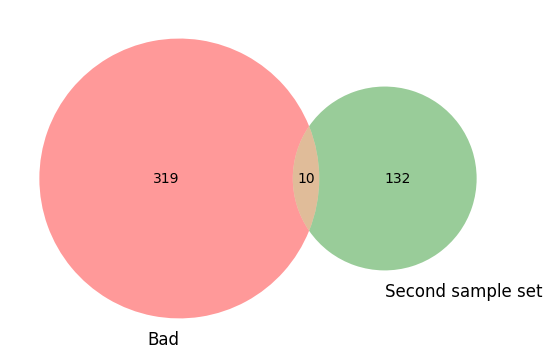

In [30]:
# plot vienn diagram for kinga1 & kinga2
venn2([set(bad['sample']), set(s2['smpls_name'])], set_labels = ('Bad', 'Second sample set'))

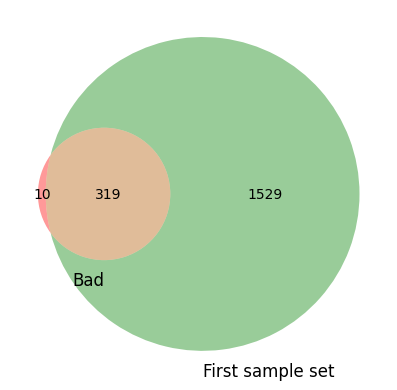

In [32]:
# plot vienn diagram for kinga1 & kinga2
venn2([set(set(bad['sample'])), set(s1['smpl_name'])], set_labels = ('Bad', 'First sample set'))

## Analyse WORSE group

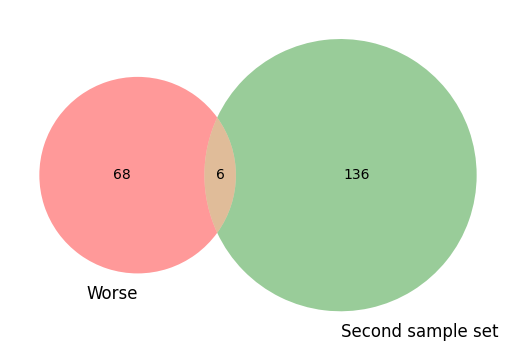

In [35]:
# plot vienn diagram for kinga1 & kinga2
venn2([set(wrs['sample']), set(s2['smpls_name'])], set_labels = ('Worse', 'Second sample set'))

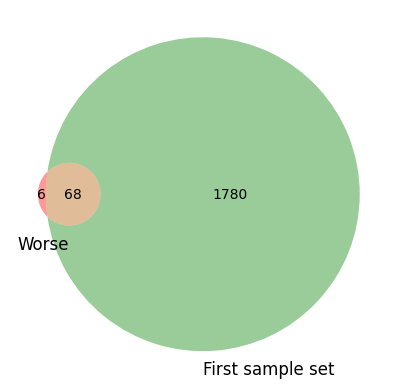

In [34]:
# plot vienn diagram for kinga1 & kinga2
venn2([set(set(wrs['sample'])), set(s1['smpl_name'])], set_labels = ('Worse', 'First sample set'))

# Does it correlate with reads number? - No

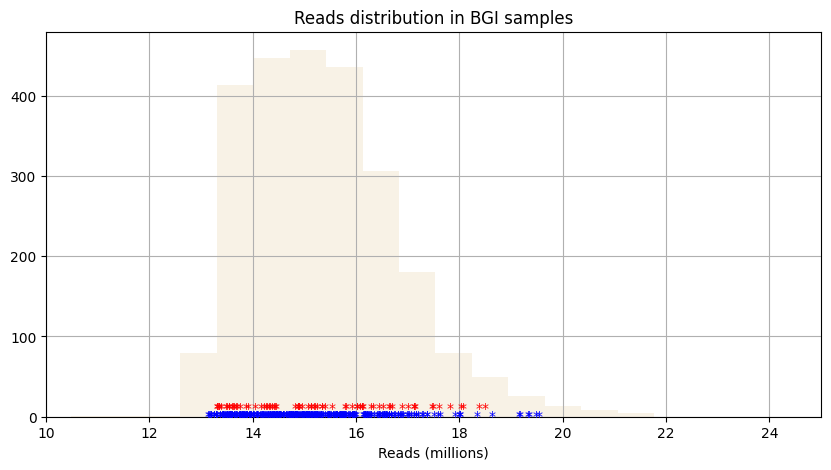

In [56]:
allB['reads'] = allB[0]/1000000
rn['reads'].hist(bins=30, figsize=(10,5), alpha=0.3, color='#ebd6ae')
plt.xlim(10, 25)
plt.title('Reads distribution in BGI samples')
plt.xlabel('Reads (millions)')


d1 =rn.merge(wrs, left_on='smpls_name', right_on='sample', how='inner')
for i in range(0, len(d1)):
    plt.text(d1['reads'][i], 10, '*', horizontalalignment='center', verticalalignment='center', fontsize=10, color='red')

d2 =rn.merge(bad, left_on='smpls_name', right_on='sample', how='inner')
for i in range(0, len(d2)):
    plt.text(d2['reads'][i], 0.5, '*', horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')

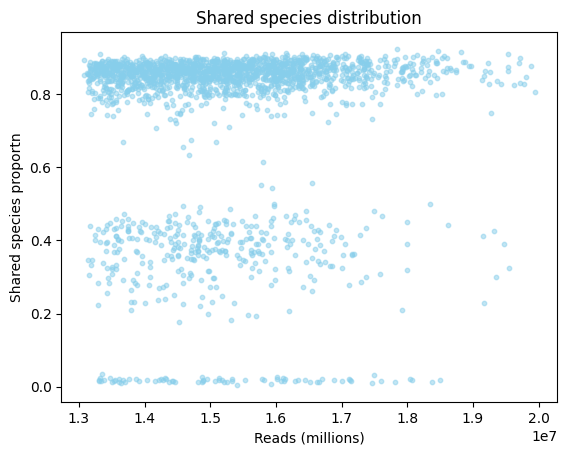

In [62]:
plt.scatter(d3['reads'], d3['shared'], color='skyblue', alpha=0.5, s=10)
plt.title('Shared species distribution')
plt.xlabel('Reads (millions)')
plt.ylabel('Shared species proportn')
plt.savefig('results/shared_species_distribution2.png')

# Does it correlate  with DNA concentration of BGI samples? - No

In [168]:
el1 = pd.read_excel('elins_files/BGI_list.xlsx')
print(len(el1))
print(len(d3))
el1.head(3)

2373
1990


,Vcode,Conc (ng/ul),260/280,260/230,Planeeritud väljastusruumala (ul),Arvestuslik kogus (ng),Kommentaar
0,V36VGE,378.6,1.45,0.73,15.0,5679.0,NaN
1,VFXXKS,354.0,1.49,0.88,15.0,5310.0,NaN
2,VPNRH4,350.1,0.53,1.46,15.0,5251.5,NaN


In [169]:
techD = el1.merge(d3, left_on='Vcode', right_on='sample', how='inner')
techD.head(3)

,Vcode,Conc (ng/ul),260/280,260/230,Planeeritud väljastusruumala (ul),Arvestuslik kogus (ng),Kommentaar,smpl_name,reads,sample,bgi,shared,ill,sample_no
0,V36VGE,378.6,1.45,0.73,15.0,5679.0,NaN,ill_V36VGE,13162317,V36VGE,0.057744,0.862304,0.079953,724.0
1,VFXXKS,354.0,1.49,0.88,15.0,5310.0,NaN,ill_VFXXKS,13678940,VFXXKS,0.089675,0.860751,0.049574,760.0
2,VPNRH4,350.1,0.53,1.46,15.0,5251.5,NaN,ill_VPNRH4,14326045,VPNRH4,0.979548,0.020452,0.000000,1932.0


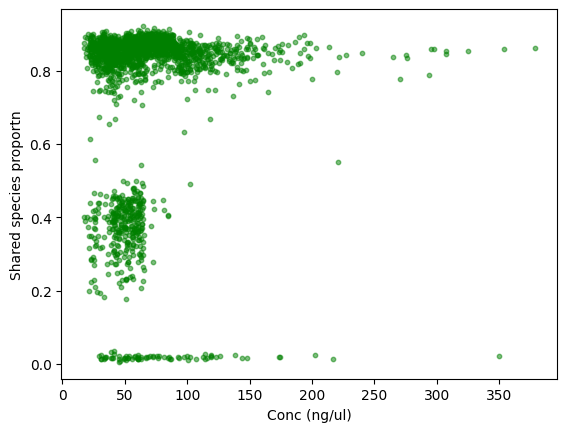

In [170]:
plt.scatter(techD['Conc (ng/ul)'], techD['shared'], color='green', alpha=0.5, s=10)

plt.xlabel('Conc (ng/ul)')
plt.ylabel('Shared species proportn')
plt.savefig('results/shared_species_distribution2.png')

# Does it correlate  with DNA concentration of Illumina samples? - No, the same DNA

2537
1990


/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


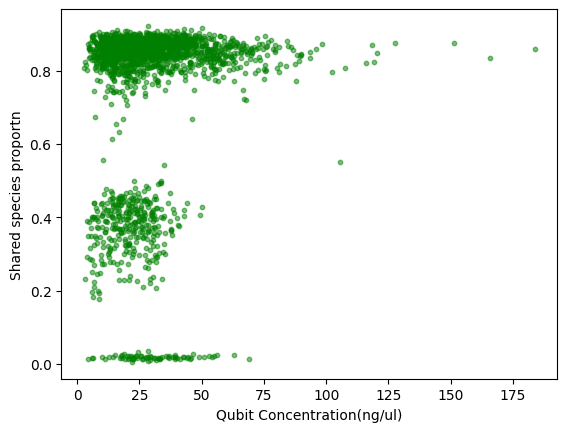

In [105]:
el2 = pd.read_excel('elins_files/Metagenome_all_samples_sent_to_Novogene.EOrg.xlsx')
print(len(el2))
print(len(d3))
techDi = el2.merge(d3, left_on='Sample Name', right_on='sample', how='inner')
plt.scatter(techDi['Qubit Concentration(ng/ul)'], techDi['shared'], color='green', alpha=0.5, s=10)

plt.xlabel('Qubit Concentration(ng/ul)')
plt.ylabel('Shared species proportn')
plt.savefig('results/Conc_bgi.png')


# Does it correlate with DNA quality of BGI samples? - No

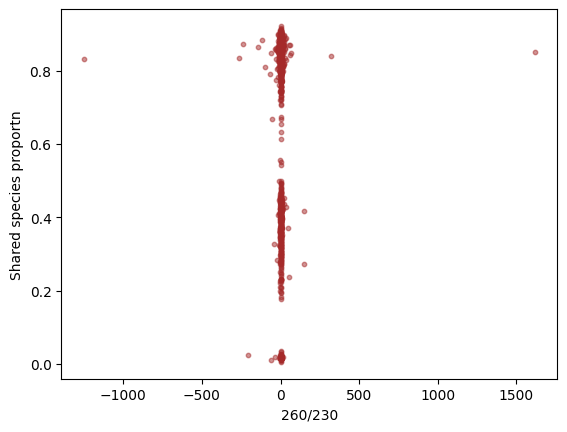

In [57]:
plt.scatter(techD['260/230'], techD['shared'], color='brown', alpha=0.5, s=10)
plt.xlabel('260/230')
plt.ylabel('Shared species proportn')
plt.savefig('results/shared_species_distribution3.png')

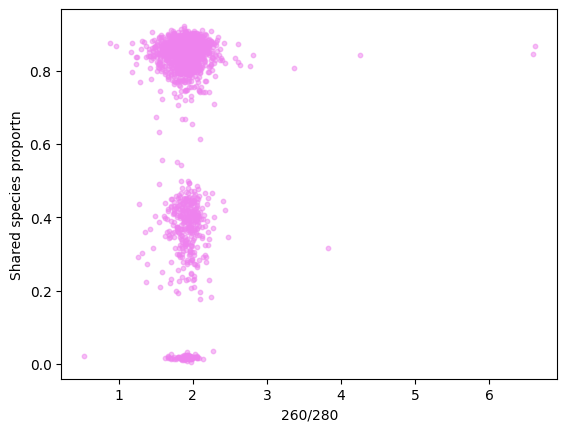

In [55]:
plt.scatter(techD['260/280'], techD['shared'], color='violet', alpha=0.5, s=10)
plt.xlabel('260/280')
plt.ylabel('Shared species proportn')
plt.savefig('results/shared_species_distribution4.png')

# Does it correlate with Number of species? - Yes (only for the worse group)
### (Sp. without filtering)

In [67]:
ill = pd.read_csv('/Users/katerynapantiukh/Library/CloudStorage/OneDrive-TartuÜlikool/2023_Illumina_vs_BGI/abud_results/Cross-Platform_set/Illumina_merged_output_all.csv')
illT = ill.T
illT['non_zero'] = illT.iloc[:, 1:].astype(bool).sum(axis=1)
illT.head(2)

,0,1,2,3,4,5,6,7,8,9,...,79278,79279,79280,79281,79282,79283,79284,79285,79286,non_zero
name,CAG-390 sp000437015,CAG-390 sp900753295,CAG-390 sp934402395,CAG-390 sp003523225,CAG-390 sp017632155,CAG-390 sp017411805,CAG-390 sp017628755,CAG-390 sp017959485,CAG-390 sp902783905,CAG-390 sp017522125,...,F1-60-MAGs163 sp009699915,Chloroploca sp004762035,Salinibacter sp003022565,Polynucleobacter sp018687195,VFJL01 sp013450215,Thioalkalivibrio versutus,Corynebacterium jeikeium,JAAYED01 sp012719135,Cuniculiplasma sp021833045,79286
ill_V97EBU,0.0373,0.00055,0.00053,0.00018,0.00004,0.00003,0.00003,0.00001,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4055


In [71]:
# Selecting the 'non_zero' column from the DataFrame and assigning it to a new DataFrame
ill_spN = illT[['non_zero']].copy()
ill_spN.rename(columns={'non_zero': 'spN'}, inplace=True)
ill_spN['sample'] = ill_spN.index.str.split('_').str[1]
ill_spN.head(2)

# merge with other data
ill_spN = techD.merge(ill_spN, on='sample', how='inner')
ill_spN.head(2)


,Vcode,Conc (ng/ul),260/280,260/230,Planeeritud väljastusruumala (ul),Arvestuslik kogus (ng),Kommentaar,smpl_name,reads,sample,bgi,shared,ill,sample_no,spN
0,V36VGE,378.6,1.45,0.73,15.0,5679.0,NaN,ill_V36VGE,13162317,V36VGE,0.057744,0.862304,0.079953,724.0,3182
1,VFXXKS,354.0,1.49,0.88,15.0,5310.0,NaN,ill_VFXXKS,13678940,VFXXKS,0.089675,0.860751,0.049574,760.0,2883


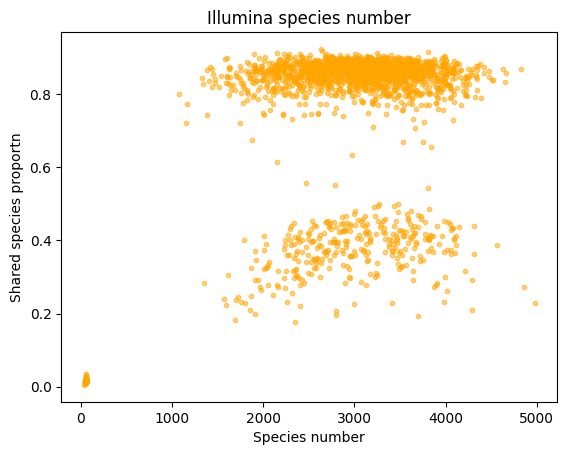

In [79]:
plt.scatter(ill_spN['spN'], ill_spN['shared'], color='orange', alpha=0.5, s=10)
plt.title('Illumina species number')
plt.xlabel('Species number')
plt.ylabel('Shared species proportn')
plt.savefig('results/species_ill_all.png')

In [75]:
bgi = pd.read_csv('/Users/katerynapantiukh/Library/CloudStorage/OneDrive-TartuÜlikool/2023_Illumina_vs_BGI/abud_results/Cross-Platform_set/BGI_merged_output_all.csv')

bgiT = bgi.T
bgiT['non_zero'] = bgiT.iloc[:, 1:].astype(bool).sum(axis=1)
bgiT.head(2)

,0,1,2,3,4,5,6,7,8,9,...,79234,79235,79236,79237,79238,79239,79240,79241,79242,non_zero
name,Phocaeicola plebeius_A,Phocaeicola sp000432735,Phocaeicola vulgatus,Phocaeicola plebeius,Phocaeicola dorei,Phocaeicola sp019414725,Phocaeicola sp900760795,Phocaeicola merdigallinarum,Phocaeicola sp019414665,Phocaeicola sartorii,...,Cryosericum sp013824685,Bradyrhizobium sp005884465,Sphingobium estronivorans,Henriciella sp019448215,JAAFIP01 sp013297865,Luminiphilus sp905479205,JALQTD01 sp023264155,Cryosericum sp022710025,Methanothrix sp002067365,79242
bgi_VNN89Q,0.06195,0.03978,0.06197,0.02342,0.01107,0.01065,0.01193,0.00272,0.00617,0.00204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3176


In [77]:
# Selecting the 'non_zero' column from the DataFrame and assigning it to a new DataFrame
bgi_spN = bgiT[['non_zero']].copy()
bgi_spN.rename(columns={'non_zero': 'spN'}, inplace=True)
bgi_spN['sample'] = bgi_spN.index.str.split('_').str[1]
bgi_spN.head(2)

# merge with other data
bgi_spN = techD.merge(bgi_spN, on='sample', how='inner')
bgi_spN.head(2)

,Vcode,Conc (ng/ul),260/280,260/230,Planeeritud väljastusruumala (ul),Arvestuslik kogus (ng),Kommentaar,smpl_name,reads,sample,bgi,shared,ill,sample_no,spN
0,V36VGE,378.6,1.45,0.73,15.0,5679.0,NaN,ill_V36VGE,13162317,V36VGE,0.057744,0.862304,0.079953,724.0,3106
1,VFXXKS,354.0,1.49,0.88,15.0,5310.0,NaN,ill_VFXXKS,13678940,VFXXKS,0.089675,0.860751,0.049574,760.0,3010


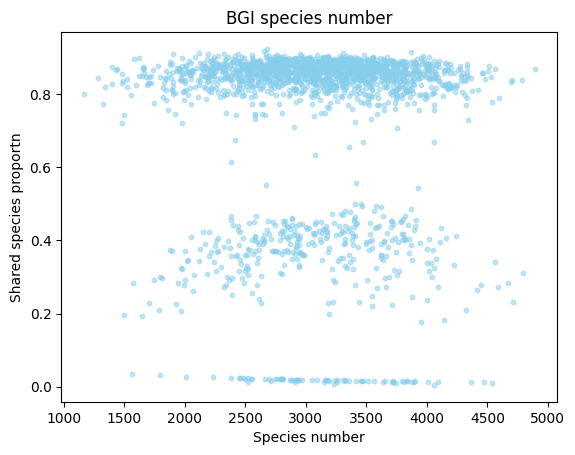

In [80]:
plt.scatter(bgi_spN['spN'], bgi_spN['shared'], color='skyblue', alpha=0.5, s=10)
plt.title('BGI species number')
plt.xlabel('Species number')
plt.ylabel('Shared species proportn')
plt.savefig('results/species_bgi_all.png')

# Does it correlate with number of species? - No
### (Sp. with more then 1% prevalence)

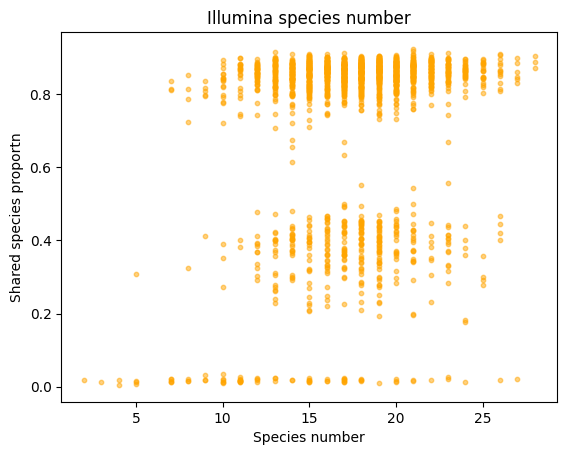

In [81]:
ill = pd.read_csv('/Users/katerynapantiukh/Library/CloudStorage/OneDrive-TartuÜlikool/2023_Illumina_vs_BGI/abud_results/Cross-Platform_set/Illumina_merged_output_part.csv')
illT = ill.T
illT['non_zero'] = illT.iloc[:, 1:].astype(bool).sum(axis=1)

# Selecting the 'non_zero' column from the DataFrame and assigning it to a new DataFrame
ill_spN = illT[['non_zero']].copy()
ill_spN.rename(columns={'non_zero': 'spN'}, inplace=True)
ill_spN['sample'] = ill_spN.index.str.split('_').str[1]
ill_spN.head(2)

# merge with other data
ill_spN = techD.merge(ill_spN, on='sample', how='inner')
ill_spN.head(2)

plt.scatter(ill_spN['spN'], ill_spN['shared'], color='orange', alpha=0.5, s=10)
plt.title('Illumina species number')
plt.xlabel('Species number')
plt.ylabel('Shared species proportn')
plt.savefig('results/species_ill_part.png')

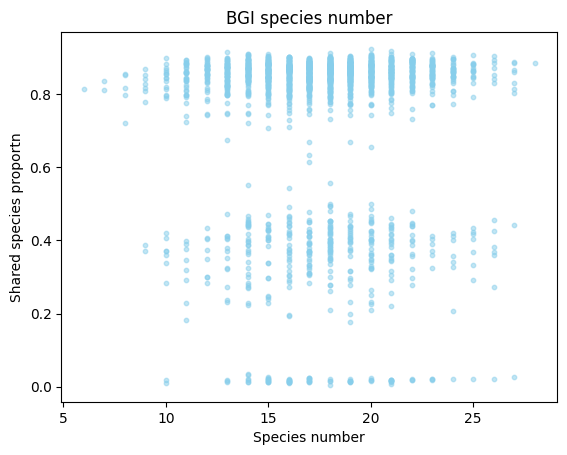

In [82]:
bgi = pd.read_csv('/Users/katerynapantiukh/Library/CloudStorage/OneDrive-TartuÜlikool/2023_Illumina_vs_BGI/abud_results/Cross-Platform_set/BGI_merged_output_part.csv')
bgiT = bgi.T
bgiT['non_zero'] = bgiT.iloc[:, 1:].astype(bool).sum(axis=1)

# Selecting the 'non_zero' column from the DataFrame and assigning it to a new DataFrame
bgi_spN = bgiT[['non_zero']].copy()
bgi_spN.rename(columns={'non_zero': 'spN'}, inplace=True)
bgi_spN['sample'] = bgi_spN.index.str.split('_').str[1]
bgi_spN.head(2)

# merge with other data
bgi_spN = techD.merge(bgi_spN, on='sample', how='inner')

plt.scatter(bgi_spN['spN'], bgi_spN['shared'], color='skyblue', alpha=0.5, s=10)
plt.title('BGI species number')
plt.xlabel('Species number')
plt.ylabel('Shared species proportn')
plt.savefig('results/species_bgi_part.png')

# Does the difference in Species number correlated with species abundance?
(samples with dramatically small number of species have only highly abundante sp?)

# All data

<Axes: >

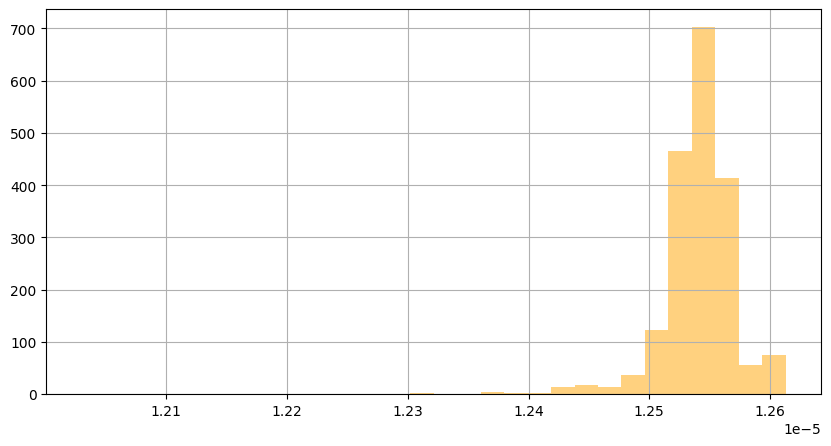

In [117]:
# abud hist
ill_spN['abud'].hist(bins=30, figsize=(10,5), alpha=0.5, color='orange')

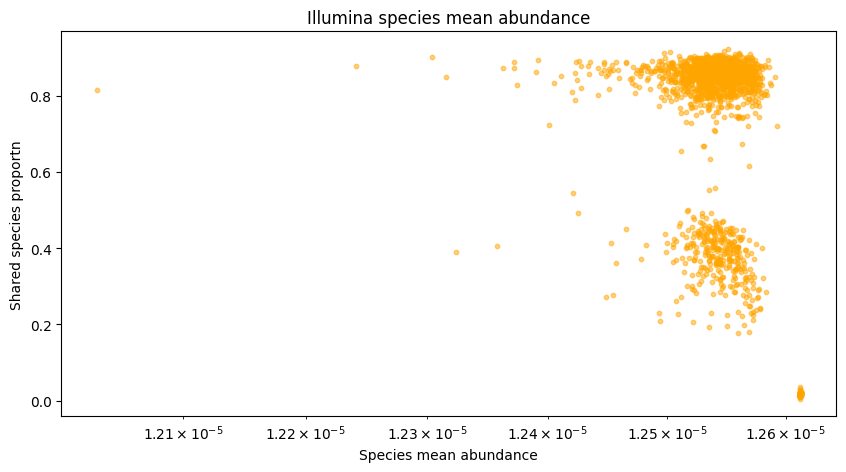

In [139]:
ill = pd.read_csv('/Users/katerynapantiukh/Library/CloudStorage/OneDrive-TartuÜlikool/2023_Illumina_vs_BGI/abud_results/Cross-Platform_set/Illumina_merged_output_all.csv')
illT = ill.T
illT['abud'] = illT.iloc[1:, 1:].mean(axis=1)

# Selecting the 'non_zero' column from the DataFrame and assigning it to a new DataFrame
ill_spN = illT[['abud']].copy()

ill_spN['sample'] = ill_spN.index.str.split('_').str[1]

# merge with other data
ill_spN = techD.merge(ill_spN, on='sample', how='inner')
ill_spN.head(2)

plt.figure(figsize=(10,5))
plt.scatter(ill_spN['abud'], ill_spN['shared'], color='orange', alpha=0.5, s=10)
plt.grid()
plt.xscale('log')
plt.title('Illumina species mean abundance')
plt.xlabel('Species mean abundance')
plt.ylabel('Shared species proportn')

plt.savefig('results/SpeciesAbud_ill_all.png')

## Part data

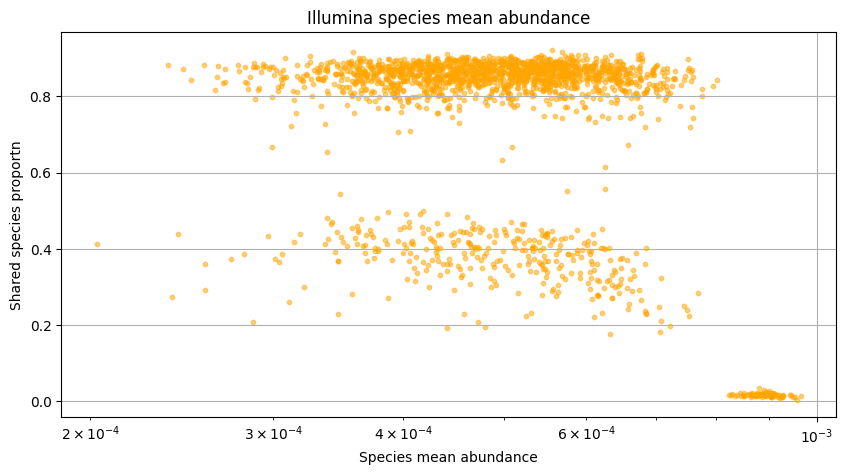

In [140]:
ill = pd.read_csv('/Users/katerynapantiukh/Library/CloudStorage/OneDrive-TartuÜlikool/2023_Illumina_vs_BGI/abud_results/Cross-Platform_set/Illumina_merged_output_part.csv')
illT = ill.T
illT['abud'] = illT.iloc[1:, 1:].mean(axis=1)

# Selecting the 'non_zero' column from the DataFrame and assigning it to a new DataFrame
ill_spN = illT[['abud']].copy()

ill_spN['sample'] = ill_spN.index.str.split('_').str[1]

# merge with other data
ill_spN = techD.merge(ill_spN, on='sample', how='inner')
ill_spN.head(2)

plt.figure(figsize=(10,5))
plt.scatter(ill_spN['abud'], ill_spN['shared'], color='orange', alpha=0.5, s=10)
plt.grid()
plt.xscale('log')
plt.title('Illumina species mean abundance')
plt.xlabel('Species mean abundance')
plt.ylabel('Shared species proportn')

plt.savefig('results/SpeciesAbud_ill_part.png')

# Ok, lets check the species list?

In [158]:
ill = pd.read_csv('/Users/katerynapantiukh/Library/CloudStorage/OneDrive-TartuÜlikool/2023_Illumina_vs_BGI/abud_results/Cross-Platform_set/Illumina_merged_output_part.csv')
ill.set_index('name', inplace=True)
wrs['sampleID'] = 'ill_'+wrs['sample']

# pick only columns with name from the list wrs['sample']
illW = ill[ill.columns.intersection(wrs['sampleID'])]
# drop raws with all zeros
illW = illW.loc[(illW!=0).any(axis=1)]
illW

,ill_V67E83,ill_V19CVF,ill_VS2Y5X,ill_V3VRBX,ill_VP3UH4,ill_VF6LCL,ill_VCE74N,ill_VEFRKO,ill_VZ4EH6,ill_VA1T4X,...,ill_VRHMDV,ill_V8FXNG,ill_V2L5KC,ill_VLUM7Y,ill_V4Z3GI,ill_VMQ99A,ill_VP08G6,ill_V3B6EO,ill_V60HX3,ill_VDZJH4
name,,,,,,,,,,,,,,,,,,,,,
Butyrivibrio_A crossotus,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0,0.00000,0.00000
Prevotella copri_B,0.63544,0.00000,0.00000,0.11742,0.0,0.0,0.0,0.20457,0.10842,0.06984,...,0.00000,0.00000,0.03397,0.00000,0.0000,0.00000,0.00000,0.0,0.00000,0.00000
Prevotella copri,0.04675,0.00000,0.00000,0.10278,0.0,0.0,0.0,0.03624,0.08337,0.04093,...,0.00000,0.00000,0.02509,0.00000,0.0000,0.00000,0.00000,0.0,0.00000,0.00000
Phocaeicola plebeius,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.03531,0.0000,0.14114,0.00000,0.0,0.00000,0.00000
Bacteroides uniformis,0.00000,0.42202,0.21607,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,...,0.43258,0.42775,0.00000,0.00000,0.0000,0.00000,0.22801,0.0,0.00000,0.43653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAG-170 sp900751035,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0,0.00000,0.00000
RUG115 sp900315735,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0,0.00000,0.00000
Lachnospira sp019424245,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0,0.00000,0.00000


In [161]:
ill = pd.read_csv('/Users/katerynapantiukh/Library/CloudStorage/OneDrive-TartuÜlikool/2023_Illumina_vs_BGI/abud_results/Cross-Platform_set/Illumina_merged_output_part.csv')
ill.set_index('name', inplace=True)
bad['sampleID'] = 'ill_'+bad['sample']
# pick only columns with name from the list wrs['sample']
illB = ill[ill.columns.intersection(bad['sampleID'])]
# drop raws with all zeros
illB = illW.loc[(illB!=0).any(axis=1)]
illB

/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_20902/1129575735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad['sampleID'] = 'ill_'+bad['sample']


,ill_V67E83,ill_V19CVF,ill_VS2Y5X,ill_V3VRBX,ill_VP3UH4,ill_VF6LCL,ill_VCE74N,ill_VEFRKO,ill_VZ4EH6,ill_VA1T4X,...,ill_VRHMDV,ill_V8FXNG,ill_V2L5KC,ill_VLUM7Y,ill_V4Z3GI,ill_VMQ99A,ill_VP08G6,ill_V3B6EO,ill_V60HX3,ill_VDZJH4
name,,,,,,,,,,,,,,,,,,,,,
Butyrivibrio_A crossotus,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.00000
Prevotella copri_B,0.63544,0.00000,0.00000,0.11742,0.0,0.0,0.0,0.20457,0.10842,0.06984,...,0.00000,0.00000,0.03397,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.00000
Prevotella copri,0.04675,0.00000,0.00000,0.10278,0.0,0.0,0.0,0.03624,0.08337,0.04093,...,0.00000,0.00000,0.02509,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.00000
Phocaeicola plebeius,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.03531,0.00000,0.14114,0.00000,0.0,0.0,0.00000
Bacteroides uniformis,0.00000,0.42202,0.21607,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,...,0.43258,0.42775,0.00000,0.00000,0.00000,0.00000,0.22801,0.0,0.0,0.43653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bacteroides cutis,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.00000
Phocaeicola intestinalis,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.00000
Bacteroides luhongzhouii,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.00000


In [162]:
illB.index

Index(['Butyrivibrio_A crossotus', 'Prevotella copri_B', 'Prevotella copri',
       'Phocaeicola plebeius', 'Bacteroides uniformis',
       'Bacteroides cellulosilyticus', 'Bacteroides eggerthii',
       'Bacteroides sp900552405', 'Bacteroides salyersiae',
       'Bacteroides thetaiotaomicron',
       ...
       'Coprococcus sp000154245', 'Vescimonas sp900313295',
       'Phocaeicola sp900542985', 'Bacteroides fragilis_A',
       'Bacteroides sp900556215', 'Bacteroides cutis',
       'Phocaeicola intestinalis', 'Bacteroides luhongzhouii',
       'Phocaeicola sartorii', 'Mediterranea sp905201685'],
      dtype='object', name='name', length=144)

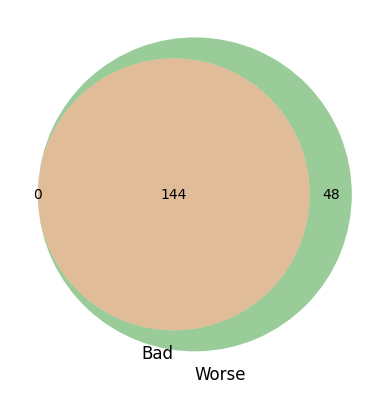

In [163]:
# plot vienn diagram for kinga1 & kinga2
venn2([set(set(illB.index)), set(illW.index)], set_labels = ('Bad', 'Worse'))